In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 17.8MB/s]
100% 149M/149M [00:07<00:00, 19.5MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []
  # Iterate through directories in the the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)
  # Create a dataframe with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df


In [ ]:
tr_df = get_class_paths("/content/Training")
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [ ]:
ts_df = get_class_paths("/content/Testing")
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


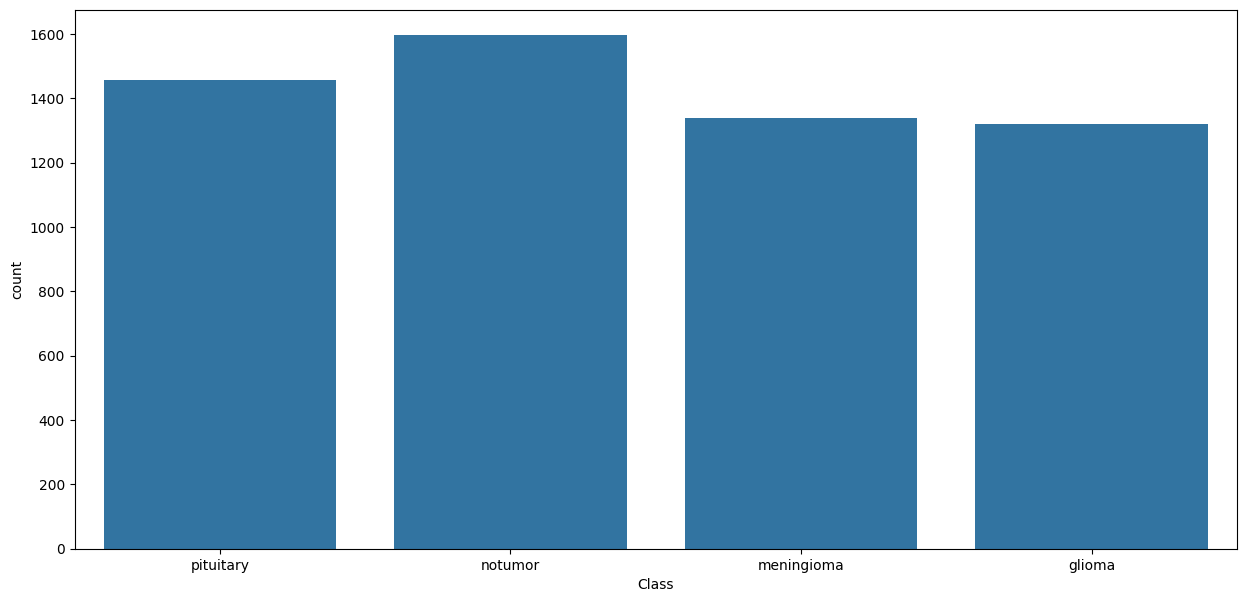

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

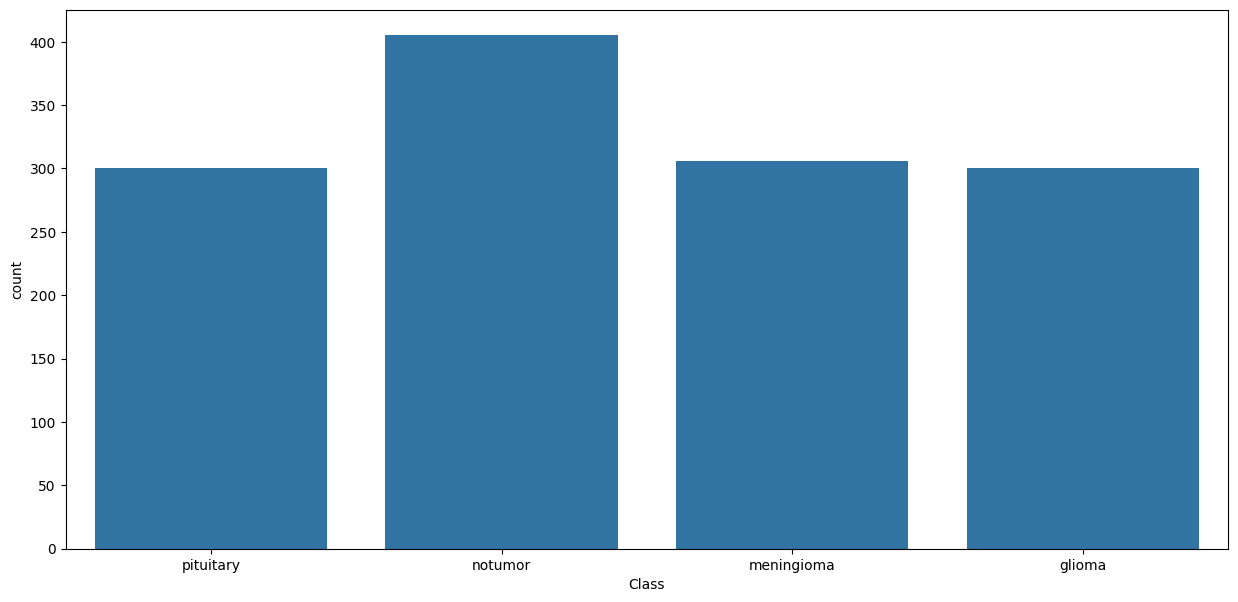

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, random_state=25, stratify=ts_df['Class'])
valid_df

,Class Path,Class
65,/content/Testing/pituitary/Te-pi_0192.jpg,pituitary
520,/content/Testing/notumor/Te-no_0396.jpg,notumor
593,/content/Testing/notumor/Te-no_0241.jpg,notumor
1053,/content/Testing/glioma/Te-gl_0030.jpg,glioma
652,/content/Testing/notumor/Te-no_0027.jpg,notumor
...,...,...
956,/content/Testing/meningioma/Te-me_0135.jpg,meningioma
200,/content/Testing/pituitary/Te-pi_0078.jpg,pituitary
1196,/content/Testing/glioma/Te-gl_0164.jpg,glioma
871,/content/Testing/meningioma/Te-me_0093.jpg,meningioma


In [ ]:
ts_df

,Class Path,Class
1269,/content/Testing/glioma/Te-gl_0224.jpg,glioma
942,/content/Testing/meningioma/Te-me_0142.jpg,meningioma
415,/content/Testing/notumor/Te-no_0158.jpg,notumor
95,/content/Testing/pituitary/Te-pi_0198.jpg,pituitary
600,/content/Testing/notumor/Te-no_0176.jpg,notumor
...,...,...
410,/content/Testing/notumor/Te-no_0385.jpg,notumor
507,/content/Testing/notumor/Te-no_0307.jpg,notumor
1087,/content/Testing/glioma/Te-gl_0288.jpg,glioma
844,/content/Testing/meningioma/Te-me_0051.jpg,meningioma


In [ ]:
batch_size = 32
img_size = (299, 299)

# Image data generator this allow us to ealisy prepocess our imgs by rescaling the pixels values and adjusting the brightness
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    shuffle= False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


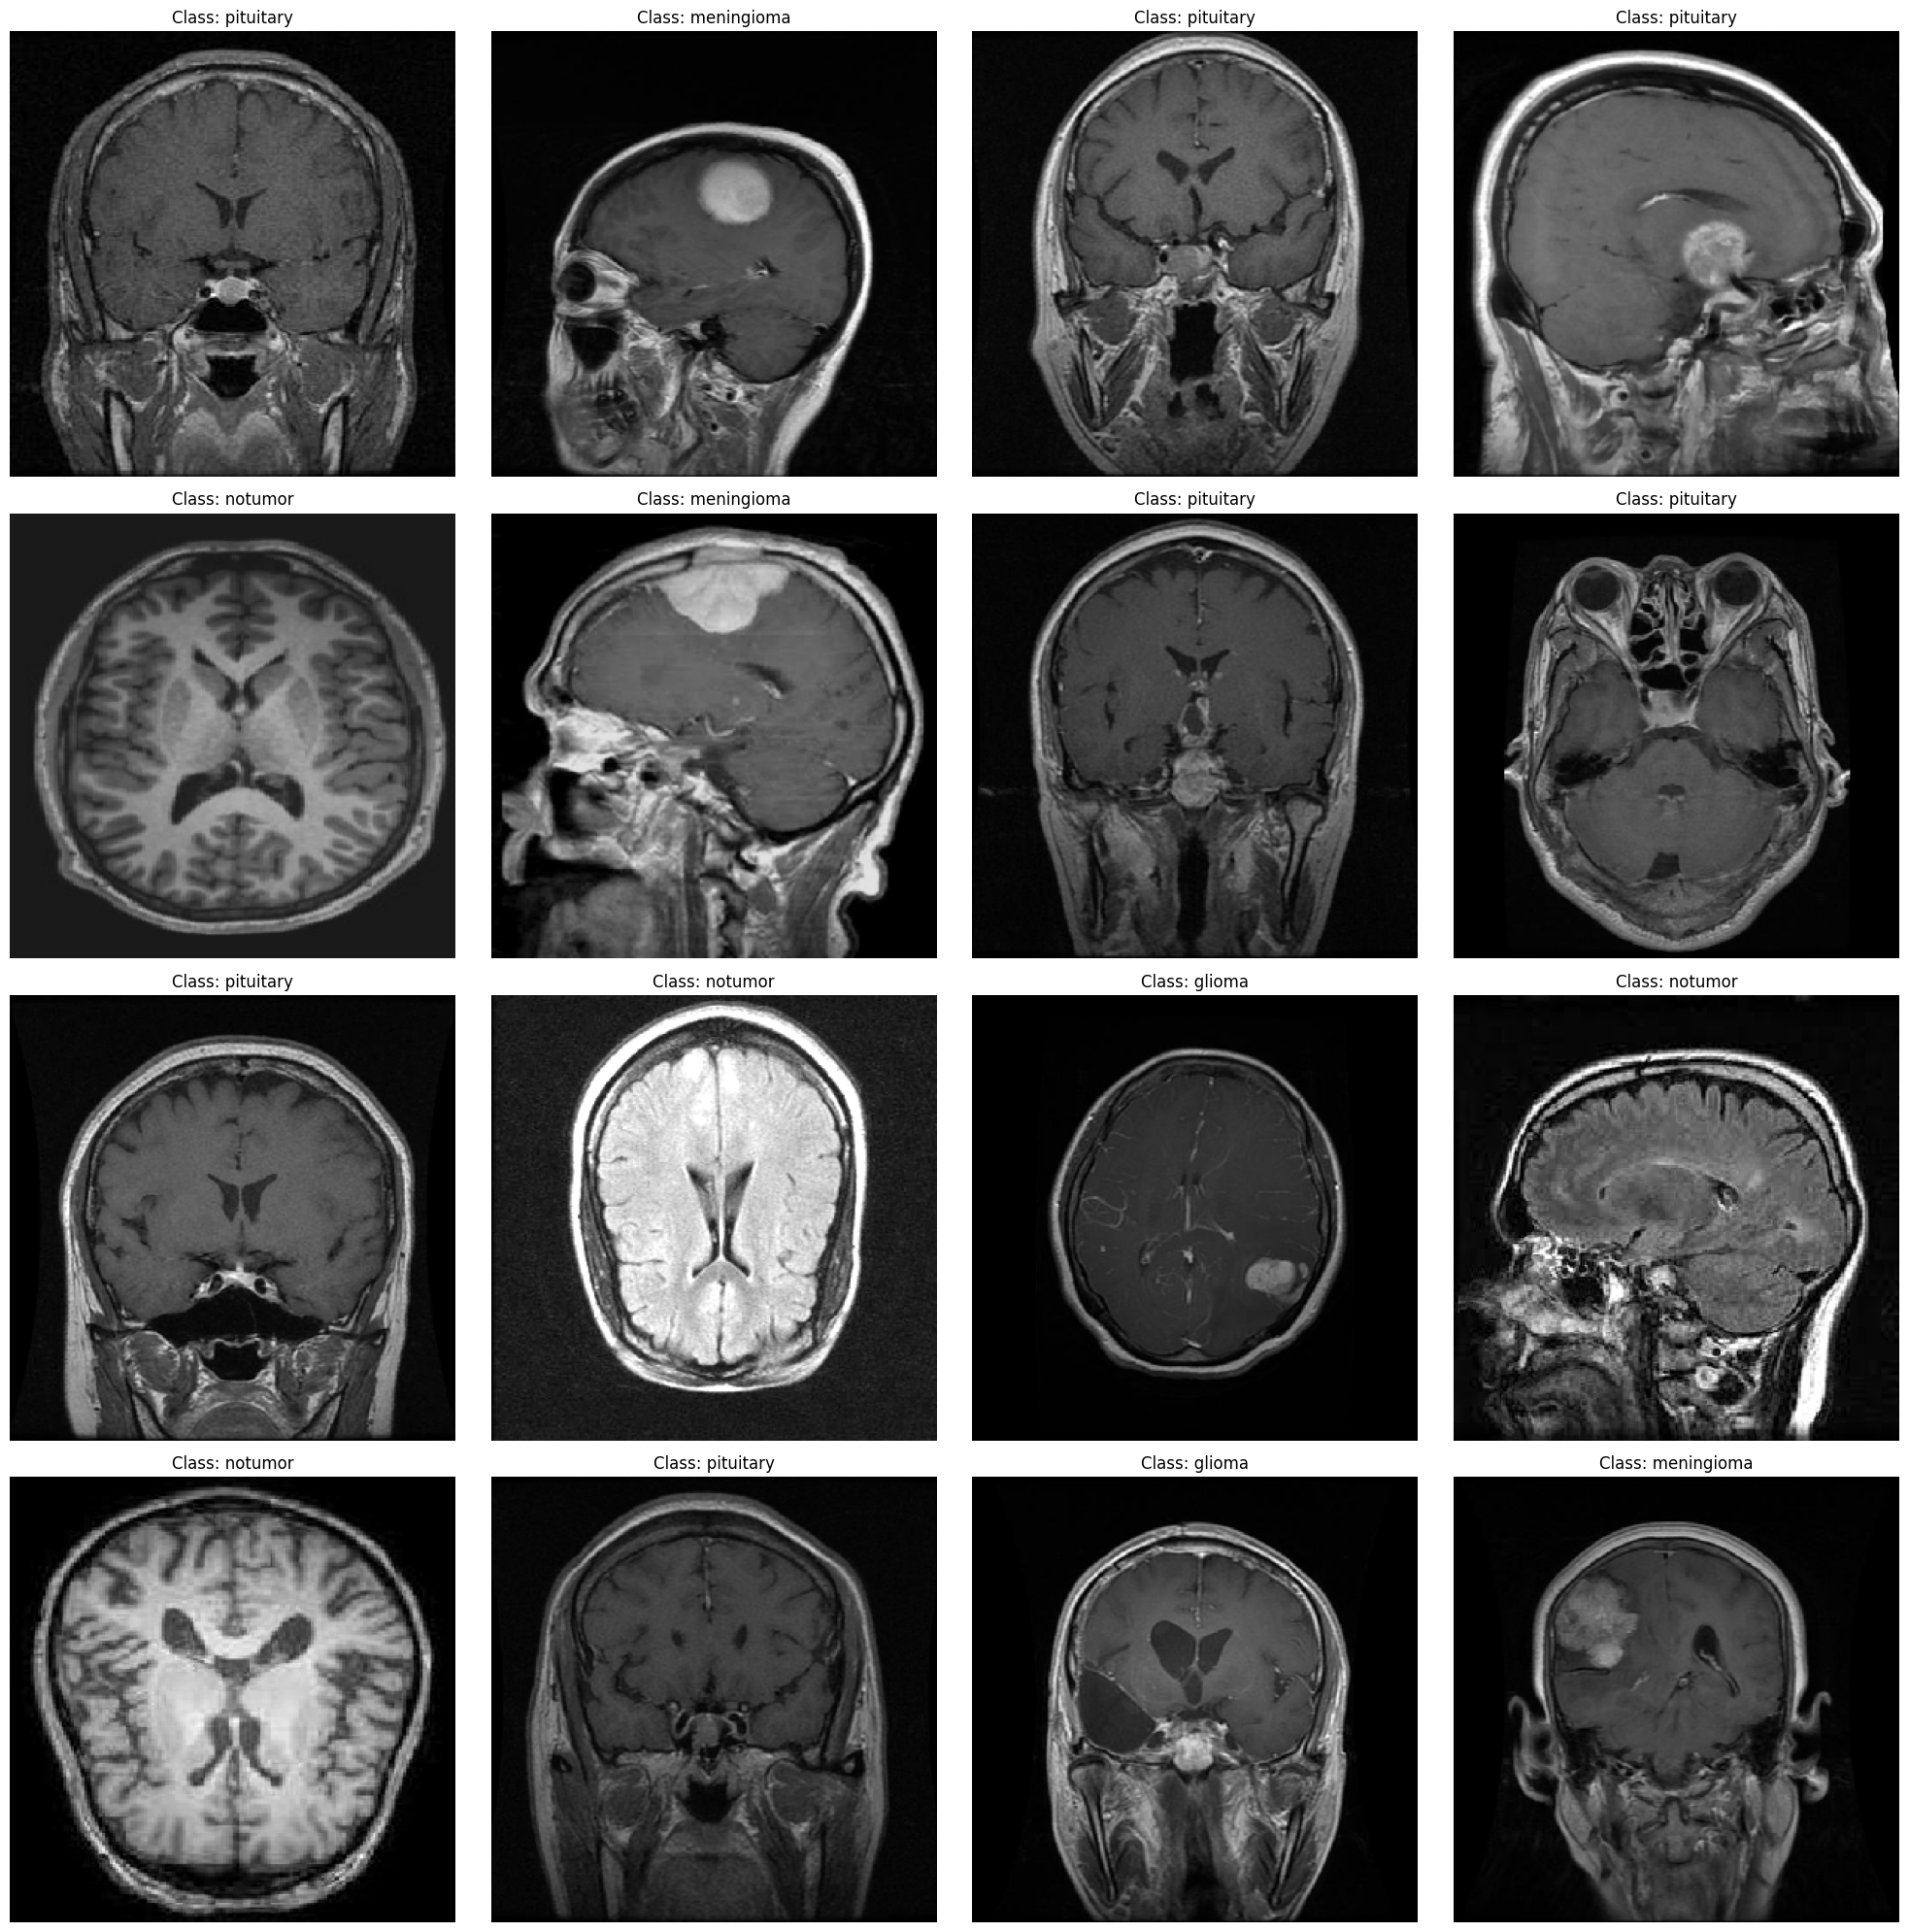

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)
  # Get the class index
  class_index = np.argmax(label)
  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]
  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='max'
)

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

In [ ]:
# Now let's train the model
hist = model.fit(tr_gen,validation_data=valid_gen,epochs=5)
# Epoch determines how many we will go through the training dataset

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}
# Find the best epoch and values
best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx= np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]
# Plot the metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2,2,i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric],'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)
plt.suptitle('Training and Validation Metrics', fontsize=18)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)
print(f'Train Accuracy: {train_score[1]*100:.2f}')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValid Accuracy: {valid_score[1]*100:.2f}')
print(f'Valid Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}')
print(f'Test Loss: {test_score[0]:.4f}')

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels= list(class_dict.keys())
  # Create figure
  plt.figure(figsize=(6, 8))
  # Load and process image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model prediction
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(predictions)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

  # Plot probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel('Probability', fontsize=15)
  plt.title('Class Probabilities')

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')
  plt.tight_layout()
  plt.show()

  print(f'Predicted tumor type: {predicted_class}')


In [ ]:
# predict("/content/Testing/notumor/Te-noTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.keras")

# Convolutional Neural Network

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16
img_size = (224, 224)

# Image data generator this allow us to ealisy prepocess our imgs by rescaling the pixels values and adjusting the brightness
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=batch_size,
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    target_size=img_size,
    batch_size=16,
    shuffle= False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create sequential model
cnn_model = Sequential()

# Add convolutional layers

cnn_model.add(Conv2D(1024, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(BatchNormalization())


cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(BatchNormalization())


cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.35))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with neurons for 4 classes

# Compile the model
cnn_model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall()]
)
# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 1024)      │          28,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 1024)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 1024)      │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 512)       │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │              

 Total params: 7,108,548 (27.12 MB)

 Trainable params: 7,104,580 (27.10 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=20, validation_data=valid_gen)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 88s 138ms/step - accuracy: 0.6398 - loss: 5.2070 - precision: 0.6736 - recall: 0.5955 - val_accuracy: 0.2290 - val_loss: 8.9181 - val_precision: 0.2290 - val_recall: 0.2290
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.7949 - loss: 3.2473 - precision: 0.8148 - recall: 0.7628 - val_accuracy: 0.6641 - val_loss: 2.7800 - val_precision: 0.7178 - val_recall: 0.6290
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.8431 - loss: 2.1509 - precision: 0.8601 - recall: 0.8219 - val_accuracy: 0.7344 - val_loss: 1.9445 - val_precision: 0.7508 - val_recall: 0.7176
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.8835 - loss: 1.4463 - precision: 0.8968 - recall: 0.8679 - val_accuracy: 0.8244 - val_loss: 1.3183 - val_precision: 0.8379 - val_recall: 0.7969
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.9114 - loss: 0.9986 - precision: 0.9203 - recall: 0.9030 - val_accuracy: 0.8046 - val_loss

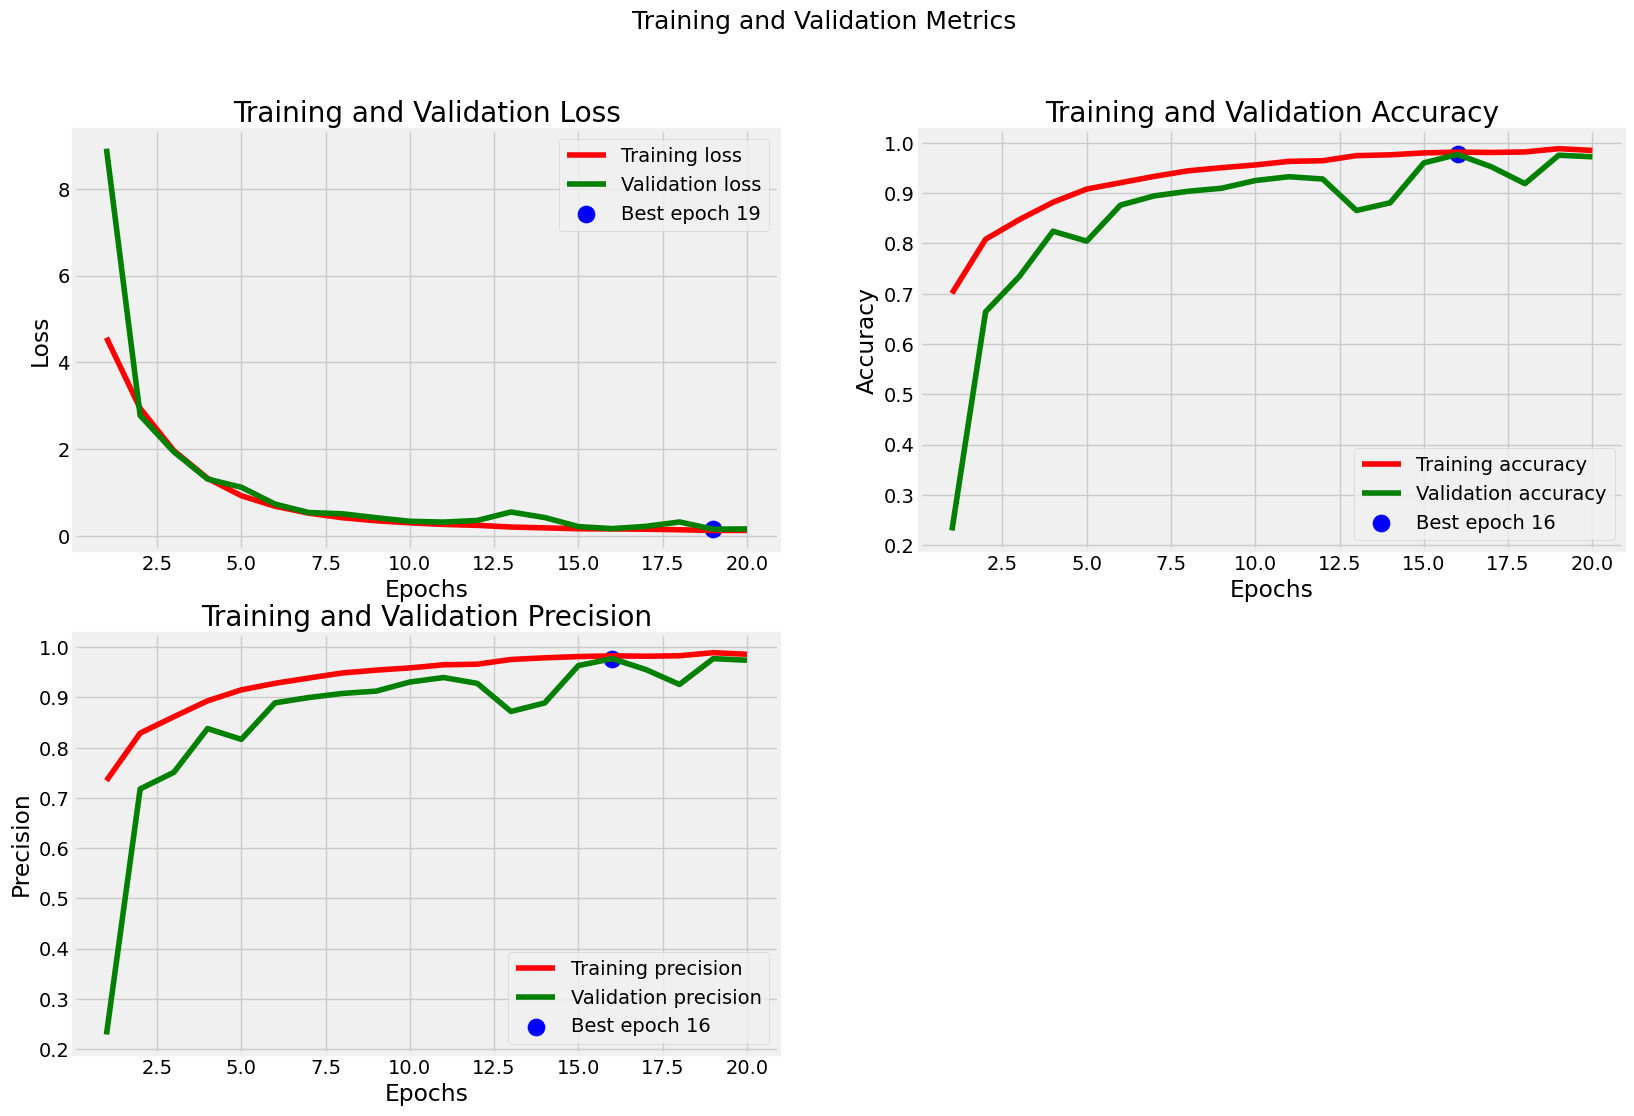

In [ ]:
# Get training and validation metrics from history
metric_names = ['loss', 'accuracy', 'precision', 'recall_1']
tr_metrics = {m: history.history[m] for m in metric_names if m in history.history}
val_metrics = {m: history.history[f'val_{m}'] for m in metric_names if f'val_{m}' in history.history}

# Find the best epoch and values
best_epochs = {}
best_values = {}

for m in metric_names:
    if m in val_metrics:  # Check if metric exists in validation data
        if m == 'loss':
            idx = np.argmin(val_metrics[m])
        else:
            idx = np.argmax(val_metrics[m])
        best_epochs[m] = idx + 1
        best_values[m] = val_metrics[m][idx]

# Plot the metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metric_names, 1):
    if metric in tr_metrics and metric in val_metrics:  # Check if metric exists in both training and validation data
        plt.subplot(2, 2, i)
        epochs = range(1, len(tr_metrics[metric]) + 1)

        plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
        plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
        if metric in best_epochs:  # Check if best epoch exists for this metric
            plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch {best_epochs[metric]}')

        plt.title(f'Training and Validation {metric.title()}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.title())
        plt.legend()
        plt.grid(True)

plt.suptitle('Training and Validation Metrics', fontsize=18)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)
print(f'Train Accuracy: {train_score[1]*100:.2f}')
print(f'Train Loss: {train_score[0]:.4f}')
print(f'\n\nValid Accuracy: {valid_score[1]*100:.2f}')
print(f'Valid Loss: {valid_score[0]:.4f}')
print(f'\n\nTest Accuracy: {test_score[1]*100:.2f}')
print(f'Test Loss: {test_score[0]:.4f}')

357/357 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9920 - loss: 0.1342 - precision: 0.9928 - recall: 0.9908
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9715 - loss: 0.1574 - precision: 0.9719 - recall: 0.9713
 5/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9779 - loss: 0.1452 - precision: 0.9804 - recall: 0.9779

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9664 - loss: 0.1772 - precision: 0.9697 - recall: 0.9660
Train Accuracy: 99.11
Train Loss: 0.1342


Valid Accuracy: 96.95
Valid Loss: 0.1719


Test Accuracy: 96.65
Test Loss: 0.1937


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

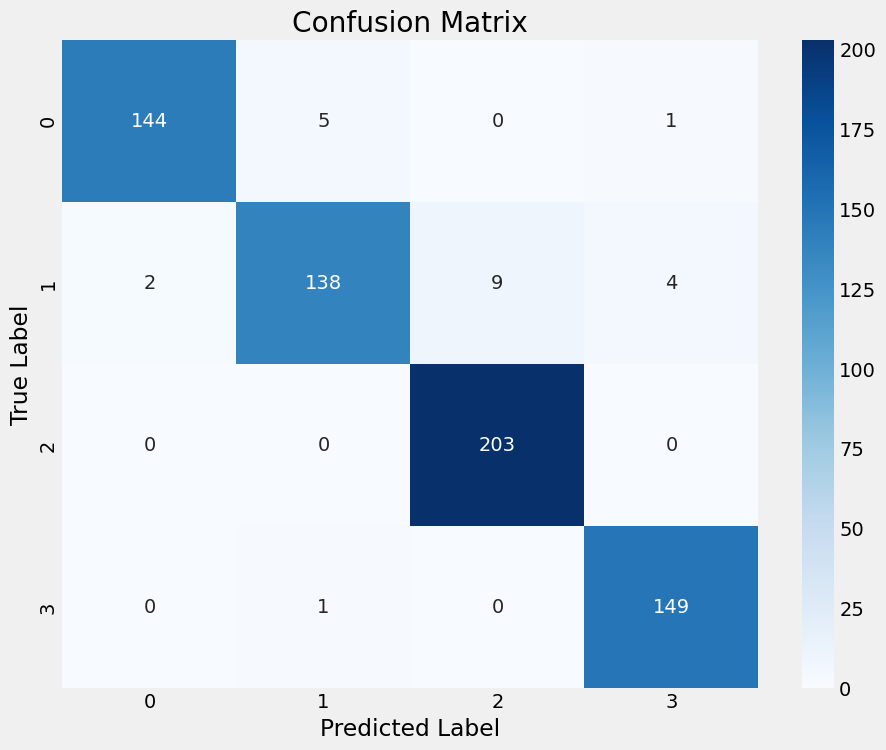

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)
class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       150
           1       0.96      0.90      0.93       153
           2       0.96      1.00      0.98       203
           3       0.97      0.99      0.98       150

    accuracy                           0.97       656
   macro avg       0.97      0.96      0.97       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
cnn_model.save("cnn_model.keras")

# Streamlit web application

In [ ]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
import os
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system('streamlit run /content/app.py --server.port 8501')

In [ ]:
%%writefile app.py
import streamlit as st

st.title("Brain Tumor Classification")
st.write("Upload a Brain MRI Scan to classify")

Writing app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public Url: ",public_url)

Public Url:  NgrokTunnel: "https://6f7b-34-124-255-142.ngrok-free.app" -> "http://localhost:8501"
